In [1]:
# kmeans

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/Users/r3dmaohong/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
num_vectors = 1000
num_clusters = 4
num_steps = 100

In [4]:
tmp = np.random.random(size=num_vectors)
x_values = [np.random.normal(0.4, 0.7) if elem>0.5 else np.random.normal(0.6, 0.4) for elem in tmp]
y_values = [np.random.normal(0.2, 0.8) if elem>0.5 else np.random.normal(0.8, 0.5) for elem in tmp]

In [5]:
vector_values = np.array(list(zip(x_values, y_values)))

In [6]:
vectors = tf.constant(vector_values)

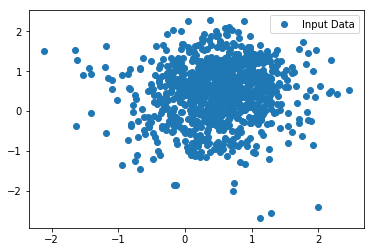

In [7]:
plt.plot(x_values, y_values, 'o', label='Input Data')
plt.legend()
plt.show()

In [8]:
n_samples = tf.shape(vectors)[0]
random_indices = tf.random_shuffle(tf.range(0, n_samples))

In [9]:
begin = [0,]
size = [num_clusters, ]

In [10]:
centroid_indices = tf.slice(random_indices, begin, size)
centroids = tf.Variable(tf.gather(vectors, centroid_indices))

In [11]:
expanded_vectors = tf.expand_dims(vectors, axis = 0)
expanded_centroids = tf.expand_dims(centroids, axis = 1)

In [12]:
print(vectors.shape)
print(expanded_vectors.shape)

(1000, 2)
(1, 1000, 2)


In [13]:
print(centroids.shape)
print(expanded_centroids.shape)

(4, 2)
(4, 1, 2)


In [14]:
vectors_subtraction = tf.subtract(expanded_vectors, expanded_centroids)

In [15]:
vectors_subtraction

<tf.Tensor 'Sub:0' shape=(4, 1000, 2) dtype=float64>

In [16]:
euclidean_distance = tf.reduce_sum(tf.square(vectors_subtraction), 2)
assignments = tf.to_int32(tf.argmin(euclidean_distance, 0))

In [17]:
partitions = tf.dynamic_partition(data=vectors, partitions=assignments, num_partitions=num_clusters)

In [18]:
update_centroids = tf.concat([tf.expand_dims(tf.reduce_mean(prt, 0), 0) for prt in partitions], 0)

In [19]:
init_op = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init_op)

for step in range(num_steps):
    _, centroid_values, assignment_values =sess.run([update_centroids,centroids,assignments])

In [20]:
def display_partition(x_values,y_values,assignment_values):
    labels = []
    colors = ["red","blue","green","yellow"]
    for i in range(len(assignment_values)):
        labels.append(colors[(assignment_values[i])])
    color = labels
    df = pd.DataFrame(dict(x =x_values,y = y_values ,color = labels ))
    fig, ax = plt.subplots()
    ax.scatter(df['x'], df['y'], c=df['color'])
    plt.show()

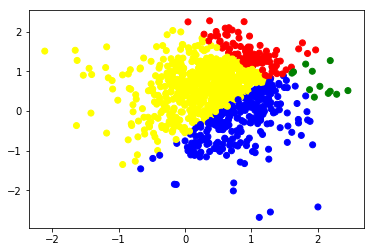

In [21]:
display_partition(x_values,y_values,assignment_values)

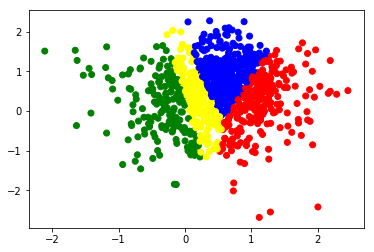

In [22]:
init_op = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init_op)

for step in range(2000):
    _, centroid_values, assignment_values =sess.run([update_centroids,centroids,assignments])

display_partition(x_values,y_values,assignment_values)

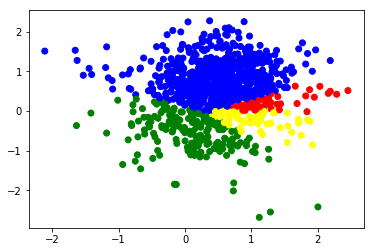

In [23]:
init_op = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init_op)

for step in range(5000):
    _, centroid_values, assignment_values =sess.run([update_centroids,centroids,assignments])

display_partition(x_values,y_values,assignment_values)

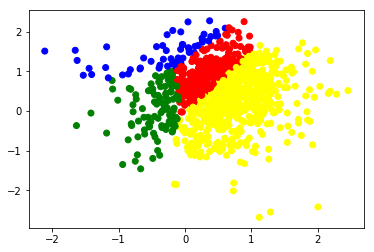

In [25]:
init_op = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init_op)

for step in range(20000):
    _, centroid_values, assignment_values =sess.run([update_centroids,centroids,assignments])

display_partition(x_values,y_values,assignment_values)